#Data Collection

In [ ]:
import csv
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/Fake.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/True.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/indian_news.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/train.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/test.csv")
df6 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/submit.csv")
df7 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/fake_ieee.csv")
df8 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/true_ieee.csv")
df9 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/news.csv")

In [ ]:
df1['label']= 0
df2['label'] = 1
df10 = pd.concat([df1,df2])

In [ ]:
df10.head()
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


**Combining df5 and df6 into df11**

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5200 non-null   int64
 1   label   5200 non-null   int64
dtypes: int64(2)
memory usage: 81.4 KB


In [ ]:
df11 = pd.merge(df5, df6, on='id', how='inner')

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
 4   label   5200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 203.2+ KB


In [ ]:
df11.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


**Merging df5,df6,df1,df2 datasets as df12**


In [ ]:
df12 = pd.merge(df10, df11, on=['title', 'text','label'], how='outer')
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50098 entries, 0 to 50097
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    49976 non-null  object 
 1   text     50091 non-null  object 
 2   subject  44898 non-null  object 
 3   date     44898 non-null  object 
 4   label    50098 non-null  int64  
 5   id       5200 non-null   float64
 6   author   4697 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


In [ ]:
df12.head()

,title,text,subject,date,label,id,author
0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,"A 10-year-old girl smacked down Donald Trump, ...",News,"February 29, 2016",0,NaN,NaN
1,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,"At this point, every Republican who refuses to...",News,"June 22, 2017",0,NaN,NaN
2,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,Donald Trump has been attacking President Obam...,News,"November 5, 2016",0,NaN,NaN
3,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,Massachusetts Rep. Jim McGovern brought the Ho...,News,"May 4, 2017",0,NaN,NaN
4,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,"August 5, 2016",0,NaN,NaN


In [ ]:
df12['label'].value_counts()

,count
label,
0,25820
1,24278


**Merging df7 and df8 as df13**

In [ ]:
df7['label'] = 0  #fake news data
df8['label'] = 1  #real news data

In [ ]:
df7.rename(columns={'Unnamed: 0':'id','Title':'title','Content':'text','Publishing Date':'date'}, inplace=True)
df8.rename(columns={'Unnamed: 0':'id','Title':'title','Content':'text','Publishing Date':'date'},inplace=True)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2422 non-null   int64 
 1   title   2422 non-null   object
 2   Len     2422 non-null   int64 
 3   text    2384 non-null   object
 4   Source  2422 non-null   object
 5   date    2422 non-null   object
 6   label   2422 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 132.6+ KB


In [ ]:
df13 = pd.merge(df7, df8, on=['title','label','Len','date','Source','text'], how='outer')
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id_x    2422 non-null   float64
 1   title   10254 non-null  object 
 2   Len     10254 non-null  int64  
 3   text    10179 non-null  object 
 4   Source  10254 non-null  object 
 5   date    10254 non-null  object 
 6   label   10254 non-null  int64  
 7   id_y    7832 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 641.0+ KB


**Mergin df12 and df13 as df 14**

In [ ]:
df12.head()

,title,text,subject,date,label,id,author
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,1,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,2,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,4,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,5,NaN


In [ ]:
df14 = pd.merge(df13, df12, on=['title', 'text','label','date'], how='outer')
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60352 entries, 0 to 60351
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_x     2422 non-null   float64
 1   title    60230 non-null  object 
 2   Len      10254 non-null  float64
 3   text     60270 non-null  object 
 4   Source   10254 non-null  object 
 5   date     55152 non-null  object 
 6   label    60352 non-null  int64  
 7   id_y     7832 non-null   float64
 8   subject  44898 non-null  object 
 9   id       5200 non-null   float64
 10  author   4697 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 5.1+ MB


In [ ]:
df14.drop(columns=['Len'],inplace=True)

**Combining df4 and df9 as df 15**

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df9.drop(columns="Unnamed: 0")

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df9['label'] = df9['label'].map({'FAKE': 0, 'REAL': 1})

In [ ]:
df15 = pd.merge(df9,df4,on=['title','text','label'],how="outer")

In [ ]:
df15.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df15

,title,text,label,id,author
0,"""Allahu Akbar, the Russians are here!"": Aleppo...","November 7, 2016 - Fort Russ News - RusVesna ...",1,13212.0,Jafe Arnoldski (noreply@blogger.com)
1,"""America has a simple ideology"": how one of Ru...",The United States comes up constantly when you...,1,NaN,NaN
2,"""Authoritarianism"": How the West demonizes str...","November 22, 2016 - Deena Stryker, Katehon - ...",1,590.0,Jafe Arnoldski (noreply@blogger.com)
3,"""Blue Alerts"" to be used to keep the 'War on C...","""Blue Alerts"" to be used to keep the 'War on C...",1,1602.0,NaN
4,"""Democracy Is Coming to the USA"" - Russia News...",This post was originally published on this sit...,1,14703.0,NaN
...,...,...,...,...,...
27130,NaN,“Do I know the risk involved in reporting on s...,1,1152.0,Miskondukt
27131,NaN,“If conservative ‘Christians’ are about Jesus ...,1,18617.0,Neil D
27132,NaN,"“Jesus” will save his soul not his body, Ignor...",1,19158.0,WakeUpAmericaPlease
27133,NaN,“Leach” Say no more.,1,2712.0,Phonics Monkey


In [ ]:
df16 = pd.merge(df14,df15,on=['title','text','id','label','author'],how='outer')

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87487 entries, 0 to 87486
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_x     2422 non-null   float64
 1   title    86807 non-null  object 
 2   text     87366 non-null  object 
 3   Source   10254 non-null  object 
 4   date     55152 non-null  object 
 5   label    87487 non-null  int64  
 6   id_y     7832 non-null   float64
 7   subject  44898 non-null  object 
 8   id       26000 non-null  float64
 9   author   23540 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.7+ MB


In [ ]:
df16.drop(columns=['id_x','id_y','id'],inplace=True)

In [ ]:
df16

,title,text,Source,date,label,subject,author
0,\r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...,"A 10-year-old girl smacked down Donald Trump, ...",NaN,"February 29, 2016",0,News,NaN
1,\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fell...,"At this point, every Republican who refuses to...",NaN,"June 22, 2017",0,News,NaN
2,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,Donald Trump has been attacking President Obam...,NaN,"November 5, 2016",0,News,NaN
3,\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers...,Massachusetts Rep. Jim McGovern brought the Ho...,NaN,"May 4, 2017",0,News,NaN
4,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,NaN,"August 5, 2016",0,News,NaN
...,...,...,...,...,...,...,...
87482,NaN,“Do I know the risk involved in reporting on s...,NaN,NaN,1,NaN,Miskondukt
87483,NaN,“If conservative ‘Christians’ are about Jesus ...,NaN,NaN,1,NaN,Neil D
87484,NaN,"“Jesus” will save his soul not his body, Ignor...",NaN,NaN,1,NaN,WakeUpAmericaPlease
87485,NaN,“Leach” Say no more.,NaN,NaN,1,NaN,Phonics Monkey


#Final merged dataset

In [ ]:
df16.to_csv("/content/drive/MyDrive/Truth_Seeker/master_news_data.csv")

In [ ]:
df16 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/master_news_data.csv")

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87487 entries, 0 to 87486
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  87487 non-null  int64 
 1   title       86807 non-null  object
 2   text        87366 non-null  object
 3   Source      10254 non-null  object
 4   date        55152 non-null  object
 5   label       87487 non-null  int64 
 6   subject     44898 non-null  object
 7   author      23540 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.3+ MB


# **Data Cleaning**

In [ ]:
#dropping source,author since there are so many null values
df16.drop(columns=['Source','author','Unnamed: 0'],inplace=True)

In [ ]:
#filing missing values in subject
df16['subject'] = df16['subject'].fillna("Unknown")

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87487 entries, 0 to 87486
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    86807 non-null  object
 1   text     87366 non-null  object
 2   date     55152 non-null  object
 3   label    87487 non-null  int64 
 4   subject  87487 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
df16['text'].duplicated().sum()

10310

In [ ]:
#dropping dupes of text
df16 = df16.drop_duplicates(subset='text')

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77177 entries, 0 to 87486
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    76547 non-null  object
 1   text     77176 non-null  object
 2   date     48756 non-null  object
 3   label    77177 non-null  int64 
 4   subject  77177 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


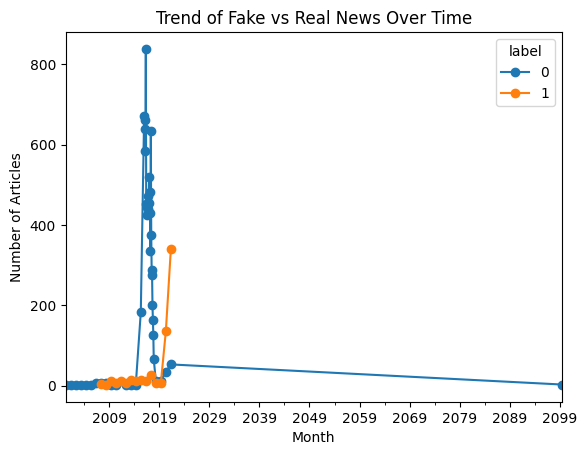

In [ ]:
df16['date'] = pd.to_datetime(df16['date'],errors='coerce')
month = df16['date'].dt.to_period("M")
df16.groupby([month, 'label']).size().unstack().plot(kind='line', marker='o')
plt.title("Trend of Fake vs Real News Over Time")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.show()

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77177 entries, 0 to 87486
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    76547 non-null  object        
 1   text     77176 non-null  object        
 2   date     11389 non-null  datetime64[ns]
 3   label    77177 non-null  int64         
 4   subject  77177 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.5+ MB


In [ ]:
#drop date
df16.drop(columns=['date'],inplace=True)

In [ ]:
df16['text'] = df16['text'].fillna('').astype(str)

In [ ]:
df16['title'].fillna('Unknown', inplace=True)

<ipython-input-4-d95499f0b1aa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df16['title'].fillna('Unknown', inplace=True)


In [ ]:
#Removing punctutations
import re
df16['text'] = df16['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df16['title'] = df16['title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df16.to_csv('/content/drive/MyDrive/Truth_Seeker/master_news_data_cleaned_almost.csv')

In [12]:
df16 = pd.read_csv('/content/drive/MyDrive/Truth_Seeker/master_news_data_cleaned_almost.csv')

In [14]:
df16[df16['text'].isnull()]
df16 = df16.dropna(subset=['text'])

In [15]:
df16['text_length'] = df16['text'].apply(len)

In [16]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77174 entries, 0 to 77175
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   77174 non-null  int64 
 1   title        76544 non-null  object
 2   text         77174 non-null  object
 3   label        77174 non-null  int64 
 4   subject      77174 non-null  object
 5   text_length  77174 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.1+ MB


In [17]:
#Saving file
df16.to_csv("/content/drive/MyDrive/Truth_Seeker/cleaned_master_data.csv")

# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

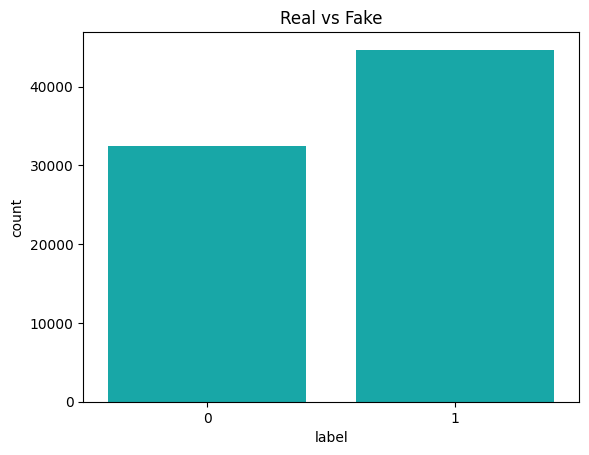

In [ ]:
sns.countplot(x='label', data=df16,color='c')
plt.title("Real vs Fake")
plt.show()

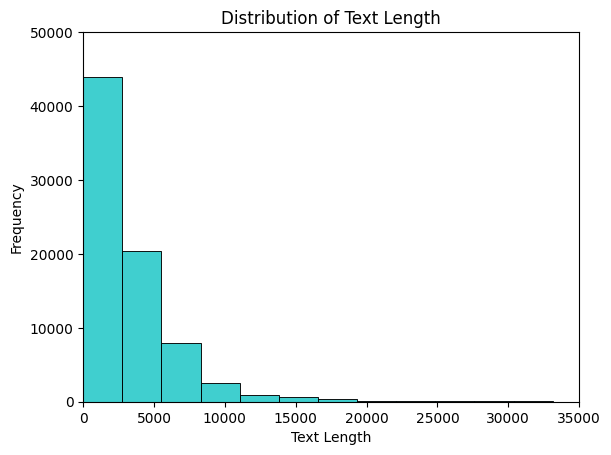

In [ ]:
sns.histplot(df16['text_length'], bins=50,color = 'c')
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xlim(0, 35000)
plt.ylim(0, 50000)
plt.show()

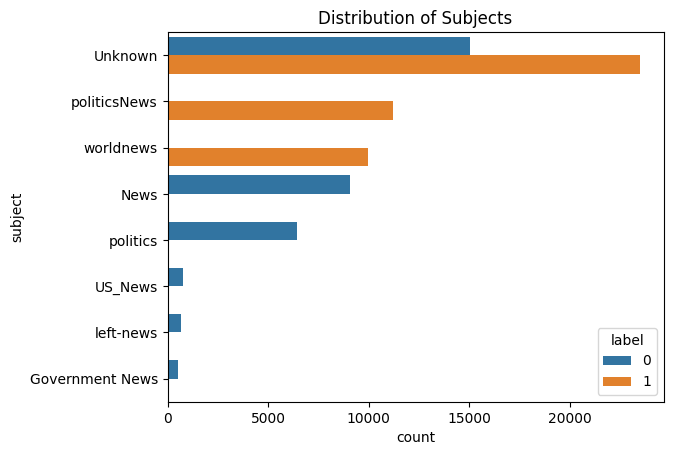

In [ ]:
sns.countplot(y='subject', hue='label', data=df16, order=df16['subject'].value_counts().index)
plt.title("Distribution of Subjects")
plt.show()

In [ ]:
grouped = df16.groupby("subject")["label"].value_counts()
print(grouped)

subject          label
Government News  0          514
News             0         9050
US_News          0          783
Unknown          1        23478
                 0        15054
left-news        0          683
politics         0         6424
politicsNews     1        11213
worldnews        1         9978
Name: count, dtype: int64


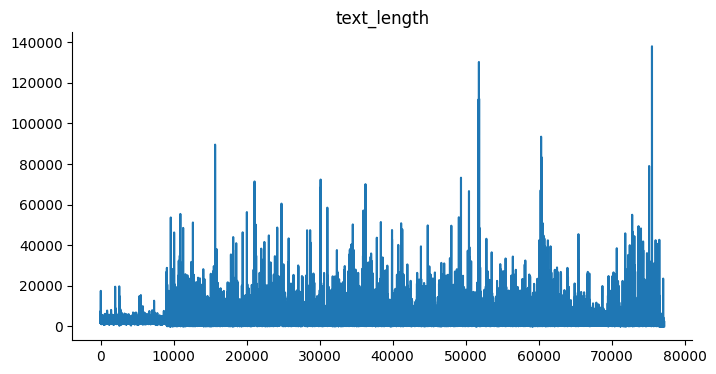

In [ ]:
from matplotlib import pyplot as plt
df16['text_length'].plot(kind='line', figsize=(8, 4), title='text_length')
plt.gca().spines[['top', 'right']].set_visible(False)

Text Length by Subject: Shows how the length of text varies by subject.

<ipython-input-30-007c9140e47c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject', y='text_length', data=df16, palette='Set3')


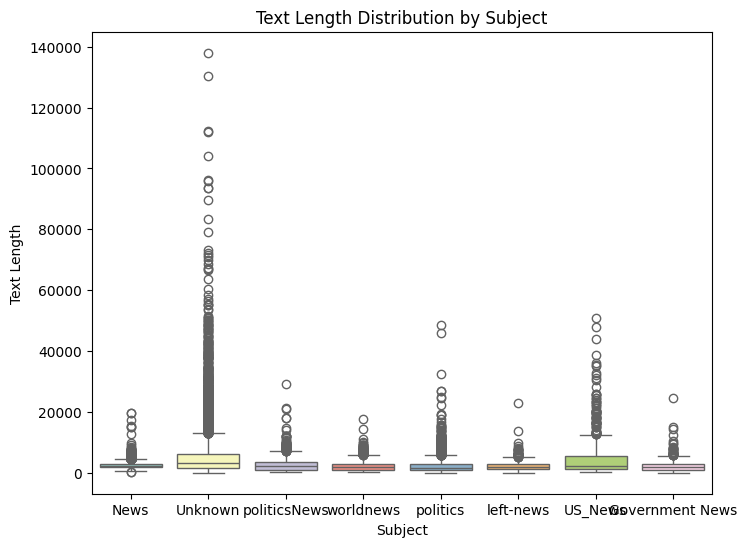

In [ ]:
# distribution of text_length by subject
plt.figure(figsize=(8, 6))
sns.boxplot(x='subject', y='text_length', data=df16, palette='Set3')
plt.title("Text Length Distribution by Subject")
plt.xlabel("Subject")
plt.ylabel("Text Length")
plt.show()

Text Length by Label: Shows whether fake and real news have different lengths.

<ipython-input-31-fb9a98278647>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df16, palette='Set3')


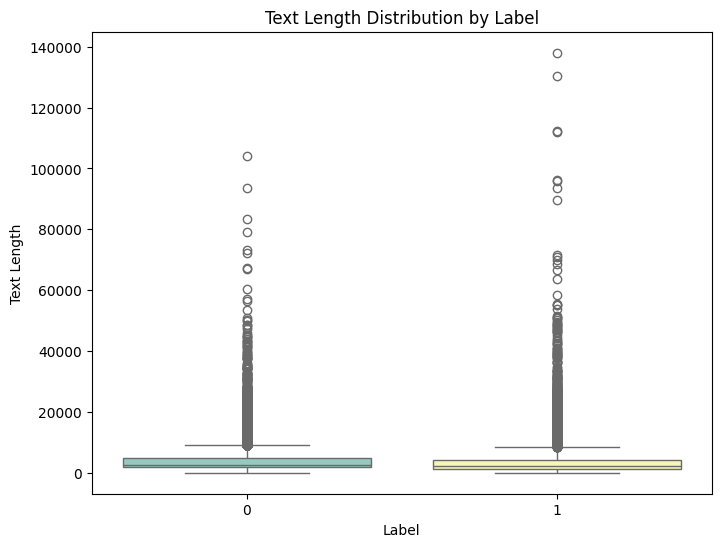

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=df16, palette='Set3')
plt.title("Text Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Text Length")
plt.show()

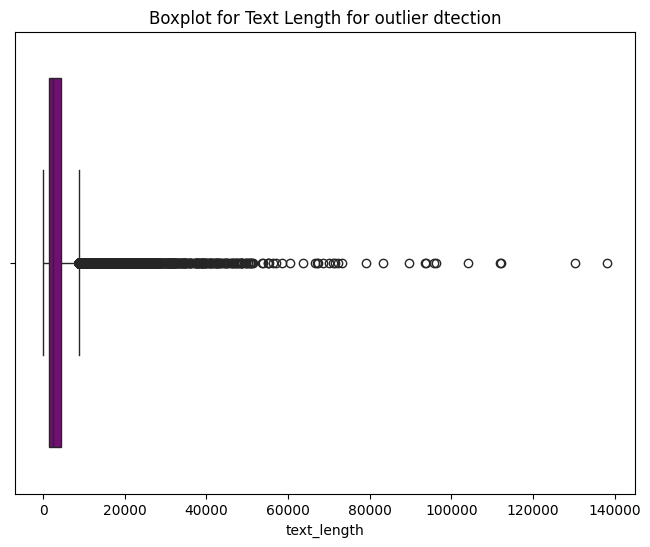

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df16['text_length'], color='purple')
plt.title("Boxplot for Text Length for outlier dtection")
plt.show()
# There are numerous outliers with very high text lengths

Correlation

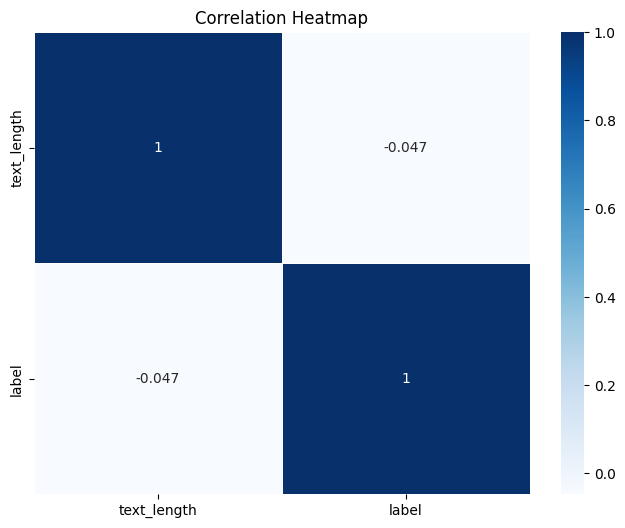

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df16[['text_length', 'label']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
#there is almost no linear relationship between the length of the text and the label

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df16[['text_length', 'label']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF:\n", vif_data)
#not multicollinear

VIF:
       Variable       VIF
0        const  3.268183
1  text_length  1.002209
2        label  1.002209


#Data Transformation

In [18]:
#transforiming subject into 3 categories bcuz they are similar
subject_mapping = {
    'Government News': 'Politics',
    'US_News': 'Politics',
    'politics': 'Politics',
    'politicsNews': 'Politics',
    'News': 'General News',
    'worldnews': 'General News',
    'left-news': 'General News',
    'Unknown': 'Unknown'
}

df16['subject_'] = df16['subject'].replace(subject_mapping)

In [19]:
grouped = df16.groupby("subject_")["label"].value_counts()
print(grouped)

subject_      label
General News  1         9978
              0         9733
Politics      1        11213
              0         7721
Unknown       1        23490
              0        15039
Name: count, dtype: int64


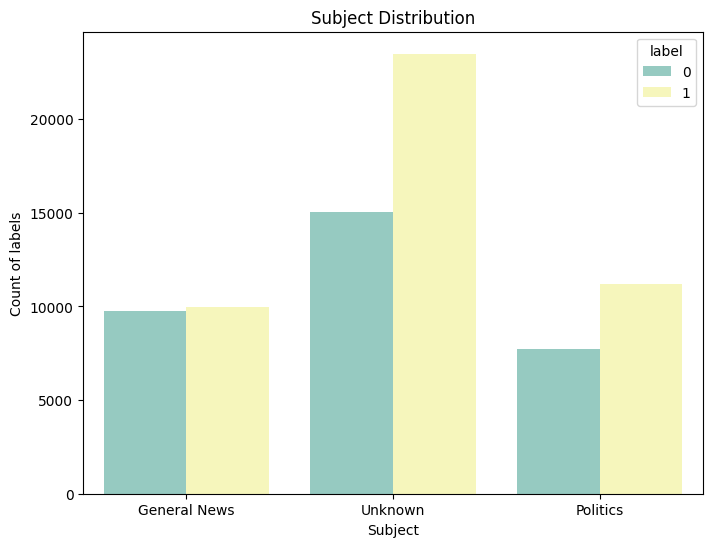

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='subject_', hue='label', data=df16,palette = 'Set3')
plt.title('Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count of labels')
plt.show()

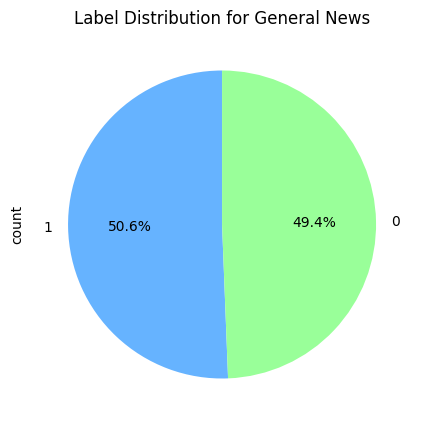

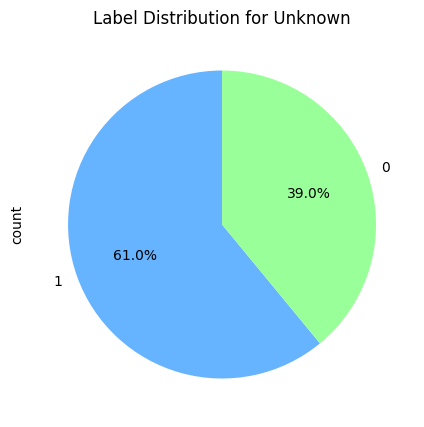

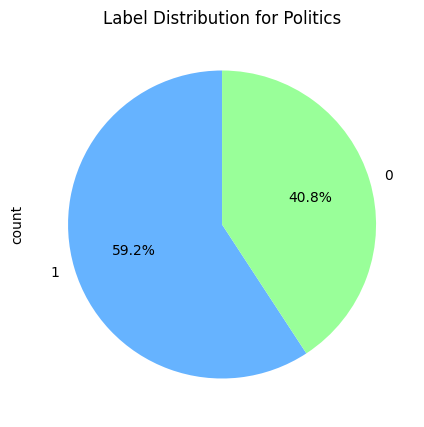

In [ ]:
subjects = df16['subject_'].unique()
for subject in subjects:
    subject_data = df16[df16['subject_'] == subject]
    label_counts = subject_data['label'].value_counts()
    plt.figure(figsize=(5, 5))
    label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
    plt.title(f'Label Distribution for {subject}')
    plt.show()

ENcoding

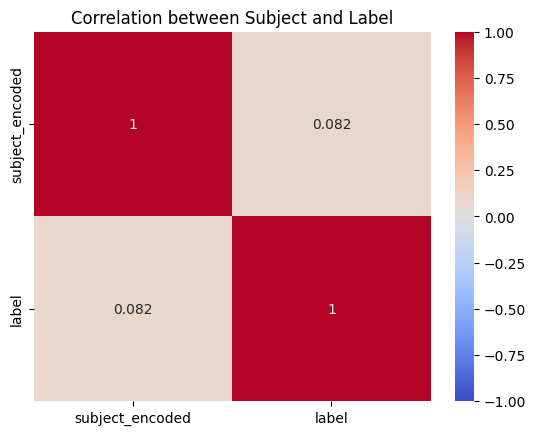

In [ ]:
df16['subject_encoded'] = df16['subject_'].astype('category').cat.codes
correlation_matrix = df16[['subject_encoded', 'label']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Subject and Label')
plt.show()
#Uncorrelated

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77174 entries, 0 to 77175
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            77174 non-null  object
 1   text             77174 non-null  object
 2   label            77174 non-null  int64 
 3   text_length      77174 non-null  int64 
 4   subject_         77174 non-null  object
 5   subject_encoded  77174 non-null  int8  
dtypes: int64(2), int8(1), object(3)
memory usage: 3.6+ MB


# Data Preprocessing


In [22]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77174 entries, 0 to 77175
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   77174 non-null  int64 
 1   title        76544 non-null  object
 2   text         77174 non-null  object
 3   label        77174 non-null  int64 
 4   subject      77174 non-null  object
 5   text_length  77174 non-null  int64 
 6   subject_     77174 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.7+ MB


Lemmatization and Stop word removal

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df16['clean_text'] = df16['text'].apply(preprocess_text)
df16['clean_title'] = df16['title'].apply(preprocess_text)

Named Entity recognition

In [ ]:
#Using spacy for NER bcuz nltk throws error
import spacy
nlp = spacy.load("en_core_web_sm")

def get_named_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

df16['named_entities'] = df16['clean_text'].apply(get_named_entities)
print(df16[['clean_text', 'named_entities']].head())

                                          clean_text  \
0  yearold girl smacked donald trump amazingon sa...   
1  point every republican refuse spine stand dona...   
2  donald trump attacking president obama campaig...   
3  massachusetts rep jim mcgovern brought house s...   
4  world like postdonald trump new hashtag aftert...   

                                      named_entities  
0  [(donald trump, PERSON), (saturday, DATE), (hu...  
1  [(republican, NORP), (america, GPE), (one, CAR...  
2  [(donald trump, PERSON), (hillary clinton, PER...  
3  [(massachusetts, GPE), (rep jim mcgovern broug...  
4  [(gop, ORG), (gop, ORG), (august aftertrumpimp...  


In [ ]:
df16.head(3)

,title,text,label,text_length,subject_,subject_encoded,clean_text,clean_title,named_entities
0,\r\r\r\r\r\r\r\nDonald Trump Gets His A Handed...,A 10yearold girl smacked down Donald Trump and...,0,2566,General News,0,yearold girl smacked donald trump amazingon sa...,donald trump get handed yearold girl video,"[(donald trump, PERSON), (saturday, DATE), (hu..."
1,\r\r\r\r\r\r\r\nExGOP Congressman Shreds Fello...,At this point every Republican who refuses to ...,0,1925,General News,0,point every republican refuse spine stand dona...,exgop congressman shred fellow republican howl...,"[(republican, NORP), (america, GPE), (one, CAR..."
2,\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining...,Donald Trump has been attacking President Obam...,0,3389,General News,0,donald trump attacking president obama campaig...,trump get stomped whining president obama usin...,"[(donald trump, PERSON), (hillary clinton, PER..."


In [78]:
df16.to_csv("/content/drive/MyDrive/Truth_Seeker/nlp_df.csv")

In [88]:
df16 = pd.read_csv("/content/drive/MyDrive/Truth_Seeker/nlp_df.csv")

In [11]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76464 entries, 0 to 76463
Columns: 5012 entries, Unnamed: 0.1 to zone
dtypes: float64(5001), int64(5), object(6)
memory usage: 2.9+ GB


In [ ]:
import langdetect
def detect_language(text):
    try:
        return langdetect.detect(text)
    except:
        return 'unknown'

df16['language'] = df16['text'].apply(detect_language)
print(df16['language'].value_counts())

language
en         76400
ru           203
es           176
de           134
unknown       61
fr            47
ar            22
pt            16
it            13
tr            11
sw             9
nl             8
so             8
no             6
ro             6
cy             6
ca             5
hr             5
pl             5
sv             4
tl             4
vi             4
el             4
et             3
sl             3
id             3
fi             3
da             2
hu             1
zh-cn          1
sk             1
cs             1
af             1
lt             1
Name: count, dtype: int64


In [86]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=60e07279925b9a23a67400e8aa527f713762e8cb98bae2f9a8ede87c86fa6bca
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [90]:
from langdetect import detect
target_language = 'en'

def filter_by_language(text, target_language):
    try:
        return detect(text) == target_language
    except:
        return False

df16 = df16[df16['text'].apply(lambda x: filter_by_language(x, target_language))]

In [91]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76464 entries, 0 to 77173
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       76464 non-null  int64 
 1   title            76464 non-null  object
 2   text             76464 non-null  object
 3   label            76464 non-null  int64 
 4   text_length      76464 non-null  int64 
 5   subject_         76464 non-null  object
 6   subject_encoded  76464 non-null  int64 
 7   clean_text       76462 non-null  object
 8   clean_title      76458 non-null  object
 9   named_entities   76464 non-null  object
dtypes: int64(4), object(6)
memory usage: 6.4+ MB


In [4]:
df16['clean_text'].fillna('', inplace=True)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df16['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
#sentiment analysis
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df16['sentiment'] = df16['clean_text'].apply(get_sentiment)

In [ ]:
#POS tagging
import nltk
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(text):
    return nltk.pos_tag(text.split())

df16['pos_tags'] = df16['clean_text'].apply(get_pos_tags)

In [8]:
#Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df16['clean_text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df16 = pd.concat([df16, tfidf_df], axis=1)
tfidf_df.to_csv("/content/drive/MyDrive/Truth_Seeker/nlp_df.csv")
print(tfidf_df.head())

      aaron  abandon  abandoned  abbott  abc  abe  abedin  ability     able  \
0  0.000000      0.0        0.0     0.0  0.0  0.0     0.0      0.0  0.00000   
1  0.000000      0.0        0.0     0.0  0.0  0.0     0.0      0.0  0.00000   
2  0.061215      0.0        0.0     0.0  0.0  0.0     0.0      0.0  0.00000   
3  0.000000      0.0        0.0     0.0  0.0  0.0     0.0      0.0  0.00000   
4  0.000000      0.0        0.0     0.0  0.0  0.0     0.0      0.0  0.04052   

   abortion  ...  younger  youre  youth   youtube  youve  zealand      zero  \
0       0.0  ...      0.0    0.0    0.0  0.073874    0.0      0.0  0.071584   
1       0.0  ...      0.0    0.0    0.0  0.000000    0.0      0.0  0.000000   
2       0.0  ...      0.0    0.0    0.0  0.000000    0.0      0.0  0.000000   
3       0.0  ...      0.0    0.0    0.0  0.000000    0.0      0.0  0.000000   
4       0.0  ...      0.0    0.0    0.0  0.000000    0.0      0.0  0.000000   

   zika  zimbabwe  zone  
0   0.0       0.0   0.0 